#### **Modeling_&_Evaluation**
#### Project name: **Telecom Customer Churn Prediction**
#### Author: **Fausto Pucheta Fortin**

#### **Introduction:** 
This notebook is the continuation of Feature_Engineer. \
Previously, key techniques such as binning, normalization, standardization, and feature selection were performed. Now, we're all set for splitting the data and training some machine learning algorithms, specifically: 
- *Decision Tree Classifier*
- *Random Forest*
- *XGBoost*. \
Later in the notebook, each algorithm's performance will be evaluated using different techniques according to the business problem. In this case, we'll use: 
- *Accuracy Score*
- *Recall*
- *F-1 Score*
- *ROC AUC*
Finally, a ML algorithm will be selected. \ 
The criterias will be:
1. Speed.
2. Capacity.
3. Interpretability.
4. Maintainability.

#### **Tasks:**
1. Data Splitting

2. Save Training, Validation, and Test data

3. Modeling and Evaluation (Choosing the best model):
    1. Training Algorithms (Decision Tree Classifier, Random Forest, and XGBoost)
    2. Visualizing Scores.

4. Feature Importance Analysis
    1. Feature Importance Scores
    2. Partial Dependency Plots (PDPs)
    3. SHAP (Shapley Additive exPlanations) Values
    
#### **Findings:**


#### **Further steps:**


In [37]:
import sys
sys.path.append('../src/functions')


# EDA functions
from plot_functions import *

# Analysis libraries
import numpy as np
import pandas as pd
import pickle

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Plot Functions
from plot_functions import *

# Data Splitting and Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import joblib
from sklearn.metrics import make_scorer
from modelling import *


# Import data frame
#df = pd.read_pickle("../data/processed/modeling_df.pkl")


1. Data Splitting

In [14]:
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target variable

# Validation set
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Splitting the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

In [15]:
print("Training set distribution:")
print(y_train.value_counts())

print("Validation set distribution:")
print(y_val.value_counts())

print("Testing set distribution:")
print(y_test.value_counts())

Training set distribution:
Churn
1.0    196344
0.0    157300
Name: count, dtype: int64
Validation set distribution:
Churn
1.0    42218
0.0    33563
Name: count, dtype: int64
Testing set distribution:
Churn
1.0    41930
0.0    33851
Name: count, dtype: int64


2. Save Training, Validation, and Test data

In [16]:
# Save the training data
with open('../data/processed/train_df/X_train.pkl', 'wb') as file:
    pickle.dump(X_train, file)

with open('../data/processed/train_df/y_train.pkl', 'wb') as file:
    pickle.dump(y_train, file)

# Saving the validation data
with open('../data/processed/validation_df/X_val', 'wb') as file:
    pickle.dump(X_val, file)
    
with open('../data/processed/validation_df/y_val', 'wb') as file:
    pickle.dump(y_val, file)
    
# Save the testing data
with open('../data/processed/test_df/X_test.pkl', 'wb') as file:
    pickle.dump(X_test, file)

with open('../data/processed/test_df/y_test.pkl', 'wb') as file:
    pickle.dump(y_test, file)

In [2]:
X_train, y_train, X_test, y_test = (pd.read_pickle("../data/processed/train_df/X_train.pkl"),
                                    pd.read_pickle("../data/processed/train_df/y_train.pkl"),
                                    pd.read_pickle("../data/processed/test_df/X_test.pkl"),
                                    pd.read_pickle("../data/processed/test_df/y_test.pkl"),
                                    )

3. Modeling (Choosing the best model)

1. Training Algorithms (Decision Tree Classifier, Random Forest, and XGBoost)

In [8]:
models = {
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

model_list = []
accuracy_list = []
f1_list = []
recall_list = []
roc_auc_list = []

for model_name, model in models.items():
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test sets
    # Train set
    accuracy_train, f1_score_train, recall_train, roc_auc_train = evaluate_model(y_train, y_train_pred)
    
    # Test set
    accuracy_test, f1_score_test, recall_test, roc_auc_test = evaluate_model(y_test, y_test_pred)
    
    model_list.append(model_name)
    accuracy_list.append(accuracy_test)
    f1_list.append(f1_score_test)
    recall_list.append(recall_test)
    roc_auc_list.append(roc_auc_test)
        
    # Print results
    print(model_name)
        
    print("Model performance for Training set")
    print("- Accuracy Score: {:.4f}".format(accuracy_train))
    print("- F1 Score: {:.4f}".format(f1_score_train))
    print("- Recall Score: {:.4f}".format(recall_train))
    print("- ROC & AUC Score: {:.4f}".format(roc_auc_train))
    
    print("-" * 35)
    
    print("Model performance for Test set")
    print("- Accuracy Score: {:.4f}".format(accuracy_test))
    print("- F1 Score: {:.4f}".format(f1_score_test))
    print("- Recall Score: {:.4f}".format(recall_test))
    print("- ROC & AUC Score: {:.4f}".format(roc_auc_test))

    print("=" * 35)

Decision Tree Classifier
Model performance for Training set
- Accuracy Score: 0.9972
- F1 Score: 0.9975
- Recall Score: 0.9963
- ROC & AUC Score: 0.9973
-----------------------------------
Model performance for Test set
- Accuracy Score: 0.8666
- F1 Score: 0.8785
- Recall Score: 0.8717
- ROC & AUC Score: 0.8660
Random Forest
Model performance for Training set
- Accuracy Score: 0.9971
- F1 Score: 0.9974
- Recall Score: 0.9980
- ROC & AUC Score: 0.9970
-----------------------------------
Model performance for Test set
- Accuracy Score: 0.8958
- F1 Score: 0.9080
- Recall Score: 0.9297
- ROC & AUC Score: 0.8918


c:\Users\Fausto\Telecom-Customer-Churn-Prediction\churnvenv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Fausto\Telecom-Customer-Churn-Prediction\churnvenv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Fausto\Telecom-Customer-Churn-Prediction\churnvenv\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Fausto\Telecom-Customer-Churn-Prediction\churnvenv\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed 

XGBoost
Model performance for Training set
- Accuracy Score: 0.9216
- F1 Score: 0.9321
- Recall Score: 0.9688
- ROC & AUC Score: 0.9157
-----------------------------------
Model performance for Test set
- Accuracy Score: 0.9208
- F1 Score: 0.9311
- Recall Score: 0.9671
- ROC & AUC Score: 0.9152


In [38]:
param_grid = {
    "Decision Tree Classifier": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
    },
    "Random Forest": {
        "n_estimators": [50, 100, 150],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
    },
    "XGBoost": {
        "n_estimators": [50, 100, 150],
        "max_depth": [3, 4, 5],
        "learning_rate": [0.01, 0.1, 0.2],
    },
}
models = {
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

model_list = []
accuracy_list = []
f1_list = []
recall_list = []
roc_auc_list = []

best_model = None
best_mean_accuracy = 0.0

for model_name, model in models.items():
    # Hyperparameter tuning using RandomizedSearchCV
    if model_name in param_grid:
        param_dist = param_grid[model_name]
        random_search = RandomizedSearchCV(
            model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42, scoring=make_scorer(accuracy_score)
        )
        random_search.fit(X_train, y_train)
        best_estimator = random_search.best_estimator_
    else:
        best_estimator = model
    
    # Cross-validation
    scores = cross_val_score(best_estimator, X_train, y_train, cv=5, scoring="accuracy")
    mean_accuracy = scores.mean()
    
    # Check if this model has the best mean accuracy so far
    if mean_accuracy > best_mean_accuracy:
        best_mean_accuracy = mean_accuracy
        best_model = best_estimator
    
    # Train the best model
    best_estimator.fit(X_train, y_train)

# Now you have the best model based on mean accuracy
if best_model is not None:
    # Make predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Evaluate Train and Test sets
    # Train set
    accuracy_train, f1_score_train, recall_train, roc_auc_train = evaluate_model(y_train, y_train_pred)
    
    # Test set
    accuracy_test, f1_score_test, recall_test, roc_auc_test = evaluate_model(y_test, y_test_pred)
    
    # Best model name
    best_model_name = best_model.__class__.__name__
    
    # Print results for the best model
    print("Best Model: {}".format(best_model_name))
    print("Mean Cross-Validation Accuracy: {:.4f}".format(best_mean_accuracy))
    
    print("Model performance for Training set")
    print("- Accuracy Score: {:.4f}".format(accuracy_train))
    print("- F1 Score: {:.4f}".format(f1_score_train))
    print("- Recall Score: {:.4f}".format(recall_train))
    print("- ROC & AUC Score: {:.4f}".format(roc_auc_train))
    
    print("-" * 35)
    
    print("Model performance for Test set")
    print("- Accuracy Score: {:.4f}".format(accuracy_test))
    print("- F1 Score: {:.4f}".format(f1_score_test))
    print("- Recall Score: {:.4f}".format(recall_test))
    print("- ROC & AUC Score: {:.4f}".format(roc_auc_test))

c:\Users\Fausto\Telecom-Customer-Churn-Prediction\churnvenv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Fausto\Telecom-Customer-Churn-Prediction\churnvenv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Fausto\Telecom-Customer-Churn-Prediction\churnvenv\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Fausto\Telecom-Customer-Churn-Prediction\churnvenv\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed 

Best Model: XGBoost
Mean Cross-Validation Accuracy: 0.9209
Model performance for Training set
- Accuracy Score: 0.9261
- F1 Score: 0.9364
- Recall Score: 0.9788
- ROC & AUC Score: 0.9196
-----------------------------------
Model performance for Test set
- Accuracy Score: 0.9213
- F1 Score: 0.9319
- Recall Score: 0.9736
- ROC & AUC Score: 0.9150


In [48]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_test_pred, target_names=['No Churn', 'Churn']))
print(metrics.confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

    No Churn       0.96      0.86      0.91     33851
       Churn       0.89      0.97      0.93     41930

    accuracy                           0.92     75781
   macro avg       0.93      0.92      0.92     75781
weighted avg       0.92      0.92      0.92     75781

[[28990  4861]
 [ 1105 40825]]


In [39]:
data = {
    "Model": model_list,
    "Accuracy": accuracy_list,
    "F1 Score": f1_list,
    "Recall Score": recall_list,
    "ROC & AUC Score": roc_auc_list
}

model_results = pd.DataFrame(data).set_index("Model")
        

5. Feature Importance Analysis
    1. Feature Importance Score
    2. Partial Dependence Plots (PDPs)
    3. SHAP (Shapley Additive exPlanations)

5. 1. Feature Importance Score

In [34]:
feature_names = X_train.columns
for model_name,model in models.items():
    # Decision Tree Classifier
    clf_feature_importance = model.feature_importances_

    # Random Forest
    rf_feature_importance = model.feature_importances_

    # XGBoost
    xgb_feature_importance = model.feature_importances_


<module 'matplotlib.pyplot' from 'c:\\Users\\Fausto\\Telecom-Customer-Churn-Prediction\\churnvenv\\lib\\site-packages\\matplotlib\\pyplot.py'>

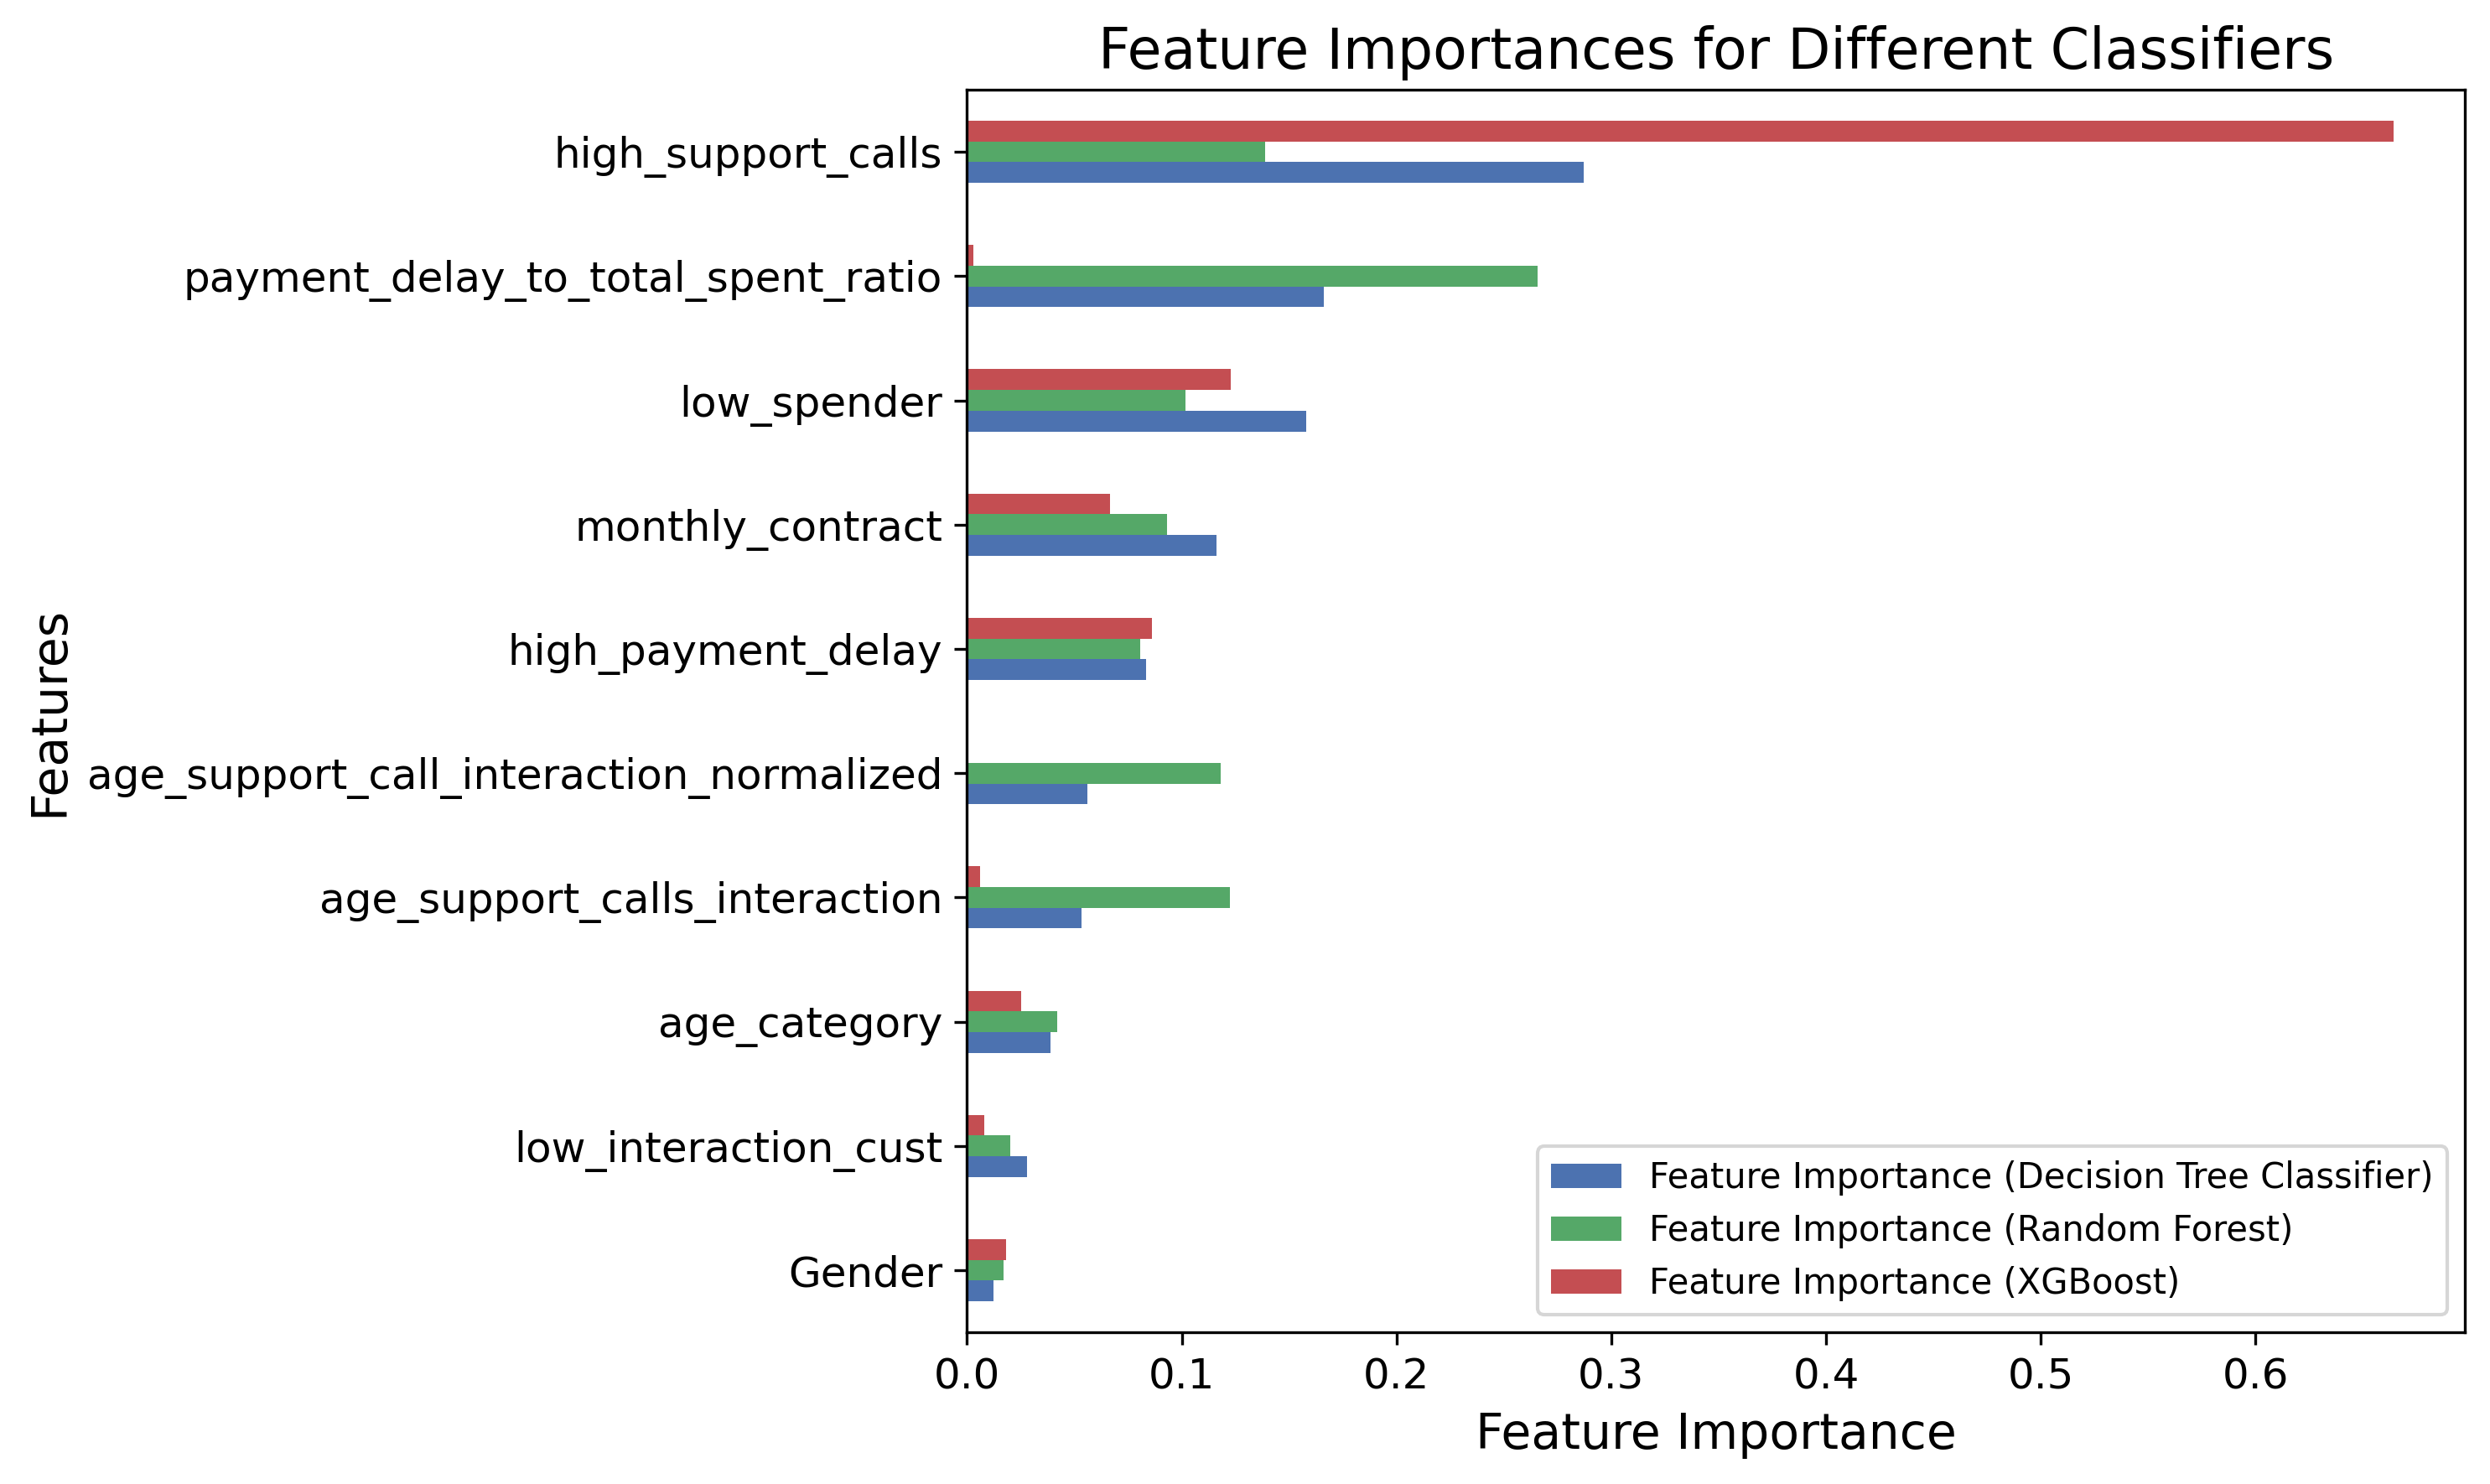

In [35]:
plot_feature_importances(models, X_train)

In [6]:
decision_tree_clf = joblib.load("../models/Decision Tree Classifier_joblib")
rf_clf = joblib.load("../models/Random Forest_joblib")
xgb_clf = joblib.load("../models/XGBoost_joblib")



Waterfall Plot